# Data Mining Assignment 2_DT_NB

# Student Details

Student Name and ID of the member submitting the assignment: 

Student Name and ID of the remaining members: 

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!<br>
Do not make any changes in the dataset file and do not rename the 'database.csv'.
<br> Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>. 
<br> Do not to forget to cite any external sources used by you. 
**10 points per question will be deducted incase you fail to do so**
<br>**DO NOT DELETE THIS CELL**<br>
#### Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn

# Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

Importing the required packages/ libraries

In [1]:
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier

# *Programming Assignment Details (5 Points)*


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Gender_Classifier.csv .Output/prediction variable is 'gender' [1 points]

In [2]:
df = pd.read_csv('Gender_Classifier.csv', encoding='latin1')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/2015 23:24,male,1.0000,yes,1.0,12/5/2013 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/2015 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/2015 23:30,male,1.0000,yes,1.0,10/1/2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/2015 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/2015 23:33,male,0.6625,yes,1.0,11/28/2014 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/2015 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/2015 23:10,male,1.0000,yes,1.0,6/11/2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/2015 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/2015 1:15,female,1.0000,yes,1.0,4/16/2014 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/2015 12:40,6.590000e+17,NaN,NaN


2) Create a dataframe and print the first and last seven records of your dataset. [1 points]

In [3]:
print("Printing the first 7 records: ")
print(df.head(7))
print("\nPrinting the last 7 records: ")
print(df.tail(7))

Printing the first 7 records: 
    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  815719226    False   finalized                   3  10/26/2015 23:24   
1  815719227    False   finalized                   3  10/26/2015 23:30   
2  815719228    False   finalized                   3  10/26/2015 23:33   
3  815719229    False   finalized                   3  10/26/2015 23:10   
4  815719230    False   finalized                   3   10/27/2015 1:15   
5  815719231    False   finalized                   3   10/27/2015 1:47   
6  815719232    False   finalized                   3   10/27/2015 1:57   

   gender  gender:confidence profile_yn  profile_yn:confidence  \
0    male             1.0000        yes                    1.0   
1    male             1.0000        yes                    1.0   
2    male             0.6625        yes                    1.0   
3    male             1.0000        yes                    1.0   
4  female             1.0000        ye

3) Print the class labels. [1 points]

In [4]:
# As this is gender classification problem, we understand that the column 'gender' is the target
# Printing the class labels depending on gender
print("Method 1: Using .unique() function:")
print(df['gender'].unique())
print("\nMethod 2: Using .drop_duplicates() function:")
print(df['gender'].drop_duplicates())

Method 1: Using .unique() function:
['male' 'female' 'brand' 'unknown' 'Other']

Method 2: Using .drop_duplicates() function:
0         male
4       female
6        brand
19     unknown
109      Other
Name: gender, dtype: object


# *Data Pre processing*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 20050 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [6]:
# We can see that the gender_gold, profile_yn_gold and tweet_cord have around 20000 null values and thus can be removed
df = df.drop(['gender_gold', 'profile_yn_gold', 'tweet_coord'], axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 20050 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  link_color             20050 non-null  object 
 13  name                   20050 non-null  object 
 14  profileimage           20050 non-null  object 
 15  re

In [7]:
# Also gender and profile_yn fields have confidence. So we can filter the values that are greater than 0.8

df = df[df['gender:confidence']>=0.8]
df = df[df['profile_yn:confidence']>=0.8]

print(df.head(5))
print(df.shape)

    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  815719226    False   finalized                   3  10/26/2015 23:24   
1  815719227    False   finalized                   3  10/26/2015 23:30   
3  815719229    False   finalized                   3  10/26/2015 23:10   
4  815719230    False   finalized                   3   10/27/2015 1:15   
5  815719231    False   finalized                   3   10/27/2015 1:47   

   gender  gender:confidence profile_yn  profile_yn:confidence  \
0    male                1.0        yes                    1.0   
1    male                1.0        yes                    1.0   
3    male                1.0        yes                    1.0   
4  female                1.0        yes                    1.0   
5  female                1.0        yes                    1.0   

           created  ...           name  \
0   12/5/2013 1:48  ...        sheezy0   
1  10/1/2012 13:51  ...    DavdBurnett   
3  6/11/2009 22:39  ...   

In [8]:
# after using the gender and profile_yn confidence level fields we can remove them
df = df.drop(['gender:confidence', 'profile_yn:confidence'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13939 entries, 0 to 20049
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _unit_id            13939 non-null  int64  
 1   _golden             13939 non-null  bool   
 2   _unit_state         13939 non-null  object 
 3   _trusted_judgments  13939 non-null  int64  
 4   _last_judgment_at   13897 non-null  object 
 5   gender              13939 non-null  object 
 6   profile_yn          13939 non-null  object 
 7   created             13939 non-null  object 
 8   description         11858 non-null  object 
 9   fav_number          13939 non-null  int64  
 10  link_color          13939 non-null  object 
 11  name                13939 non-null  object 
 12  profileimage        13939 non-null  object 
 13  retweet_count       13939 non-null  int64  
 14  sidebar_color       13939 non-null  object 
 15  text                13939 non-null  object 
 16  twee

In [9]:
# Dropping unnecessary non-discrete or categorical data

df = df.drop('tweet_location',axis=1)
df = df.drop('user_timezone',axis=1)
df = df.drop('_unit_id',axis=1)
df = df.drop('_last_judgment_at',axis=1)
df = df.drop('created',axis=1)
df = df.drop('name',axis=1)
df = df.drop('profileimage',axis=1)
df = df.drop('tweet_created',axis=1)
df = df.drop('_trusted_judgments',axis=1)
df = df.drop('_golden',axis=1)
df = df.drop('link_color',axis=1)
#df = df.drop('sidebar_color', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13939 entries, 0 to 20049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _unit_state    13939 non-null  object 
 1   gender         13939 non-null  object 
 2   profile_yn     13939 non-null  object 
 3   description    11858 non-null  object 
 4   fav_number     13939 non-null  int64  
 5   retweet_count  13939 non-null  int64  
 6   sidebar_color  13939 non-null  object 
 7   text           13939 non-null  object 
 8   tweet_count    13939 non-null  int64  
 9   tweet_id       13939 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 1.2+ MB


In [10]:
# Printing the unique values for each column

for i in range(df.shape[1]):
    print("\nUnique values of column " + df.columns[i] + " are as follows:", df[df.columns[i]].drop_duplicates().values)


Unique values of column _unit_state are as follows: ['finalized' 'golden']

Unique values of column gender are as follows: ['male' 'female' 'brand' 'unknown']

Unique values of column profile_yn are as follows: ['yes']

Unique values of column description are as follows: ['i sing my own rhythm.'
 "I'm the author of novels filled with family drama and romance."
 'Mobile guy.  49ers, Shazam, Google, Kleiner Perkins, Yahoo!, Sprint PCS, AirTouch, Air Force.  Stanford GSB, UVa.  Dad, Husband, Brother.  Golfer.'
 ...
 'The FUN site for Animal Lovers - Get the latest animal news, best pet tips and see all the fun stuff we have for animal lovers.'
 "When families go through divorce, it's helpful for parents to talk about the divorce with their children.  Mommy and Daddy are Getting a Divorce helps."
 'Anti-statist; I homeschool my kids. Aspiring thoughtleader in the field of disjunction. Obligate carnivore. Writing @haskellbook with @bitemyapp.']

Unique values of column fav_number are as fo

## *Data preprocessing continued:*

In [11]:
# We can see that the columns tweet_id and profile_yn have only 1 value and thus won't be useful for building model
# Therefore dropping those 2 columns

df = df.drop(['profile_yn', 'tweet_id'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13939 entries, 0 to 20049
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   _unit_state    13939 non-null  object
 1   gender         13939 non-null  object
 2   description    11858 non-null  object
 3   fav_number     13939 non-null  int64 
 4   retweet_count  13939 non-null  int64 
 5   sidebar_color  13939 non-null  object
 6   text           13939 non-null  object
 7   tweet_count    13939 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 980.1+ KB


In [12]:
# The column description does not contain categorical data but it can be converted to some useful data such as 
# length of description used by every person
df['desc_len'] = df['description'].str.len()
df['text_len'] = df['text'].str.len()
df = df.drop(['text'], axis=1)

df.head()

,_unit_state,gender,description,fav_number,retweet_count,sidebar_color,tweet_count,desc_len,text_len
0,finalized,male,i sing my own rhythm.,0,0,FFFFFF,110964,21.0,109
1,finalized,male,I'm the author of novels filled with family dr...,68,0,C0DEED,7471,62.0,139
3,finalized,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0,C0DEED,1693,146.0,138
4,finalized,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,0,0,31462,160.0,95
5,finalized,female,you don't know me.,3901,0,0,20036,18.0,81


In [13]:
# converting the string values in the dataset to numerical data

df._unit_state = df._unit_state.replace({'finalized': 1, 'golden': 0})
df.gender = df.gender.replace({'male': 1, 'female': 2, 'brand': 3, 'unknown': 4})
df.head()

,_unit_state,gender,description,fav_number,retweet_count,sidebar_color,tweet_count,desc_len,text_len
0,1,1,i sing my own rhythm.,0,0,FFFFFF,110964,21.0,109
1,1,1,I'm the author of novels filled with family dr...,68,0,C0DEED,7471,62.0,139
3,1,1,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0,C0DEED,1693,146.0,138
4,1,2,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,0,0,31462,160.0,95
5,1,2,you don't know me.,3901,0,0,20036,18.0,81


In [14]:
from sklearn.preprocessing import LabelEncoder

# Change the encoding type using the label encoder provided by scikit for preprocessing the string columns
le=LabelEncoder()
df['description']=le.fit_transform(df['description'])
df['fav_number']=le.fit_transform(df['fav_number'])
df['tweet_count']=le.fit_transform(df['tweet_count'])

In [15]:
# Get the only significant columns

df = df[['description', 'desc_len', 'tweet_count', 'text_len', 'fav_number', 'gender']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13939 entries, 0 to 20049
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  13939 non-null  int32  
 1   desc_len     11858 non-null  float64
 2   tweet_count  13939 non-null  int64  
 3   text_len     13939 non-null  int64  
 4   fav_number   13939 non-null  int64  
 5   gender       13939 non-null  int64  
dtypes: float64(1), int32(1), int64(4)
memory usage: 707.8 KB


# *Splitting the dataset into train, test and validation sets.*

4) Split your dataset 60% for training, 20 for validation and 20% for testing the classifier. Use random state as 2022 [2 points]

In [16]:
# Import the required package for splitting the dataset
from sklearn.model_selection import train_test_split

In [17]:
# Check the dataframe size and print it
print("Dataset size:", df.shape)
df = df.dropna(axis=0, how='any')
X = df.drop('gender', axis = 1)
y = df['gender']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 2022)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle = True, random_state = 2022)
print("Dataset size:", df.shape)

# Print the size of training set
print("\nX_train size:", X_train.shape[0])
print("y_train size:", y_train.shape[0])

# Print the size of validation set
print("\nX_val size:", X_val.shape[0])
print("y_val size:", y_val.shape[0])

# Print the size of test set
print("\nX_test size:", X_test.shape[0])
print("y_test size:", y_test.shape[0])


Dataset size: (13939, 6)
Dataset size: (11858, 6)

X_train size: 7114
y_train size: 7114

X_val size: 2372
y_val size: 2372

X_test size: 2372
y_test size: 2372


## *DecisionTree (10 Points)*

1) Use gini and entropy to measure the quality of a split. [2 points]

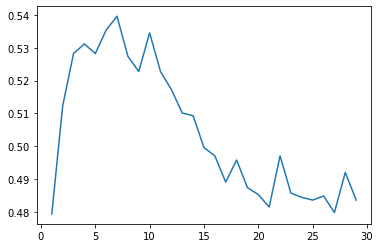

Depth with highest score for gini: 7


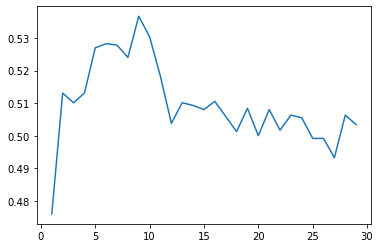

Depth with highest score for entropy: 9


In [18]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

# Check the scores for decision trees with different depths and choose the depth with maximum score for building the trees

# Gini max depth
scores=[]
for i in range(1,30):
  clf=DecisionTreeClassifier(max_depth=i,  criterion='gini') 
  clf.fit(X_train, y_train) 
  scores.append(clf.score(X_test,y_test)) 
plt.plot(range(1,30),scores) 
plt.show()
print("Depth with highest score for gini:", scores.index(max(scores))+1)

# Entropy max depth
scores=[]
for i in range(1,30):
  clf=DecisionTreeClassifier(max_depth=i,  criterion='entropy') 
  clf.fit(X_train, y_train) 
  scores.append(clf.score(X_test,y_test)) 
plt.plot(range(1,30),scores) 
plt.show()
print("Depth with highest score for entropy:", scores.index(max(scores))+1)


In [19]:
# Code for Decision Tree with criterion as gini
dt1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 7)
dt1.fit(X_train, y_train)
y1_pred = dt1.predict(X_test)

# Code for Decision Tree with criterion as entropy
dt2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 9)
dt2.fit(X_train, y_train)
y2_pred = dt2.predict(X_test)

2) Use comments to explain your code and variable names. [1 point]

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. Explain the confusion matrix and classification report in your own words). Do not copy from the internet.[4 points]

Printing the classification report:
              precision    recall  f1-score   support

           1       0.46      0.44      0.45       857
           2       0.56      0.56      0.56       880
           3       0.60      0.67      0.63       618
           4       0.00      0.00      0.00        17

    accuracy                           0.54      2372
   macro avg       0.41      0.42      0.41      2372
weighted avg       0.53      0.54      0.54      2372



Printing the confusion matrix:
[[377 317 163   0]
 [284 491 105   0]
 [150  56 412   0]
 [  4  10   3   0]]


c:\Users\patek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\patek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\patek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0, 0.5, 'male'),
 Text(0, 1.5, 'female'),
 Text(0, 2.5, 'brand'),
 Text(0, 3.5, 'unknown')]

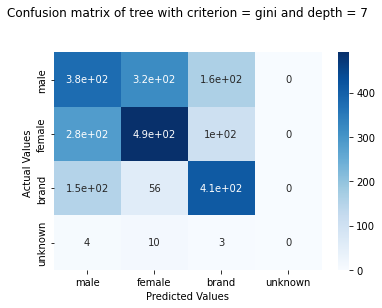

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

# Print the classification report of the decision tree with depth = 7 and criterion as gini
labels = [1,2,3,4]
labels = list(map(str,labels))
print("Printing the classification report:")
print(classification_report(y_test, y1_pred,target_names=labels))

# Print and plot the confusion matrix of the same DT
print("\n\nPrinting the confusion matrix:")
cm=confusion_matrix(y_test,y1_pred)
print(cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion matrix of tree with criterion = gini and depth = 7\n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['male', 'female', 'brand', 'unknown'])
ax.yaxis.set_ticklabels(['male', 'female', 'brand', 'unknown'])

**************** Calculation of classification report on basis of confusion matrix: ***************

1. Precision:

male = 376/(376+284+151+4) = 0.46

female = 491/(318+491+56+10) = 0.56

brand = 411/(163+105+411+3) = 0.60

unknown = 0/(0+0+0+0) = 0


2. Recall:

male = 376/(376+318+163+0) = 0.43

female = 491/(284+491+105+0) = 0.56

brand = 411/(151+56+411+0) = 0.67

unknown = 0/(4+10+3+0) = 0


3. F1 score:

male = (2*Precision*Recall)/(Precision+Recall) = (2 * 0.46 * 0.43)/(0.46 + 0.43) = 0.45

female = (2*Precision*Recall)/(Precision+Recall) = (2 * 0.56 * 0.56)/(0.56 + 0.56) = 0.56

brand = (2*Precision*Recall)/(Precision+Recall) = (2 * 0.60 * 0.67)/(0.60 + 0.67) = 0.63

unknown = (2*Precision*Recall)/(Precision+Recall) = (2 * 0 * 0)/(0 + 0) = 0


4. Support:

male = 377+317+163+0 = 857

female = 284+491+105+0 = 880

brand = 151+56+411+0 = 618

unknown = 4+10+3+0 = 17


5. Accuracy = (377 + 491 + 411 + 0)/(2372) = 0.54

Printing the classification report:
              precision    recall  f1-score   support

           1       0.45      0.46      0.46       857
           2       0.56      0.57      0.57       880
           3       0.63      0.60      0.61       618
           4       0.00      0.00      0.00        17

    accuracy                           0.54      2372
   macro avg       0.41      0.41      0.41      2372
weighted avg       0.53      0.54      0.53      2372



Printing the confusion matrix:
[[397 325 134   1]
 [293 506  80   1]
 [181  69 368   0]
 [  5   9   3   0]]


[Text(0, 0.5, 'male'),
 Text(0, 1.5, 'female'),
 Text(0, 2.5, 'brand'),
 Text(0, 3.5, 'unknown')]

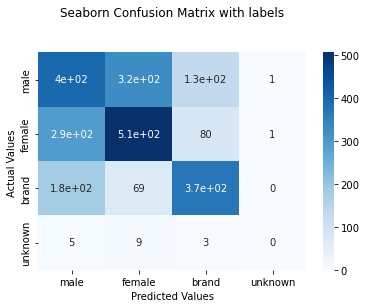

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

# Print the classification report of the DT with depth = 9 and criterion as entropy
labels = [1,2,3,4]
labels = list(map(str,labels))
print("Printing the classification report:")
print(classification_report(y_test, y2_pred,target_names=labels))

# Print the confusion matric of the same DT
print("\n\nPrinting the confusion matrix:")
cm=confusion_matrix(y_test,y2_pred)
print(cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['male', 'female', 'brand', 'unknown'])
ax.yaxis.set_ticklabels(['male', 'female', 'brand', 'unknown'])

**************** Calculation of classification report: ***************

1. Precision:

male = 398/(398+293+179+5) = 0.45

female = 504/(322+504+69+9) = 0.56

brand = 369/(136+82+369+3) = 0.63

unknown = 0/(1+1+1+0) = 0


2. Recall:

male = 398/(398+322+136+1) = 0.46

female = 504/(293+504+82+1) = 0.57

brand = 369/(179+69+369+1) = 0.60

unknown = 0/(5+9+3+0) = 0


3. F1 score:

male = (2*Precision*Recall)/(Precision+Recall) = (2 * 0.45 * 0.46)/(0.45 + 0.46) = 0.46

female = (2*Precision*Recall)/(Precision+Recall) = (2 * 0.56 * 0.57)/(0.56 + 0.57) = 0.57

brand = (2*Precision*Recall)/(Precision+Recall) = (2 * 0.63 * 0.60)/(0.63 + 0.60) = 0.61

unknown = (2*Precision*Recall)/(Precision+Recall) = (2 * 0 * 0)/(0 + 0) = 0


4. Support:

male = 377+317+163+0 = 857

female = 284+491+105+0 = 880

brand = 151+56+411+0 = 618

unknown = 4+10+3+0 = 17


5. Accuracy = (398 + 504 + 369 + 0)/(2372) = 0.54

4) Print the decision tree visualization for 3 different depths using given libraries.  [3 points]

In [22]:
# Import plt and tree to plot the decision trees
import matplotlib.pyplot as plt
from sklearn import tree

Code reference: https://mljar.com/blog/visualize-decision-tree/

### *Decision tree with criterion = gini and depth = 7*

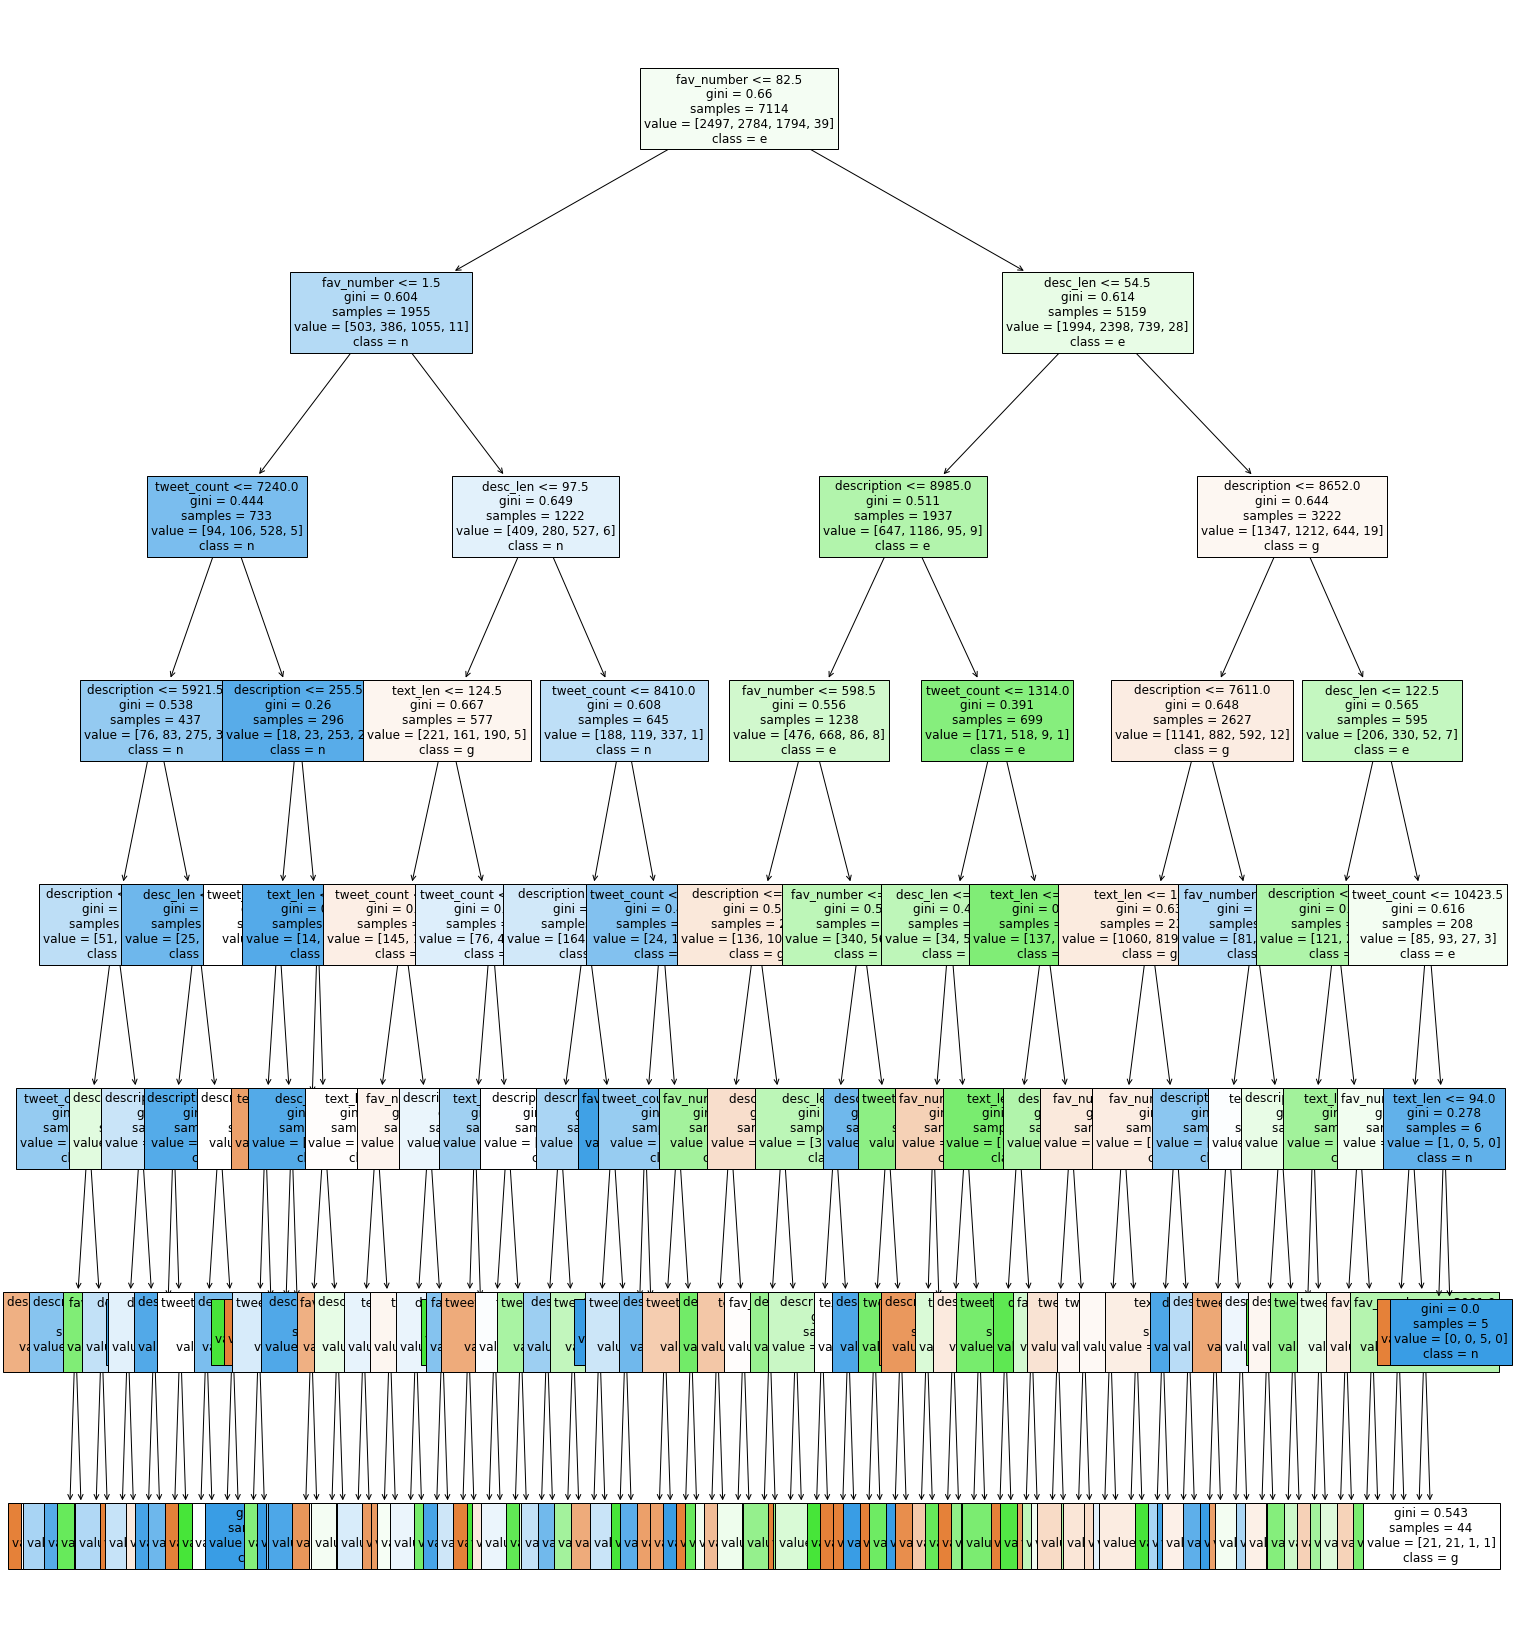

In [23]:
fig = plt.figure(figsize=(25,30))
_ = tree.plot_tree(dt1, 
                   feature_names=X.columns.values,  
                   class_names='gender',
                   filled=True, fontsize = 12)

### *Decision tree with criterion = entropy and depth = 9*

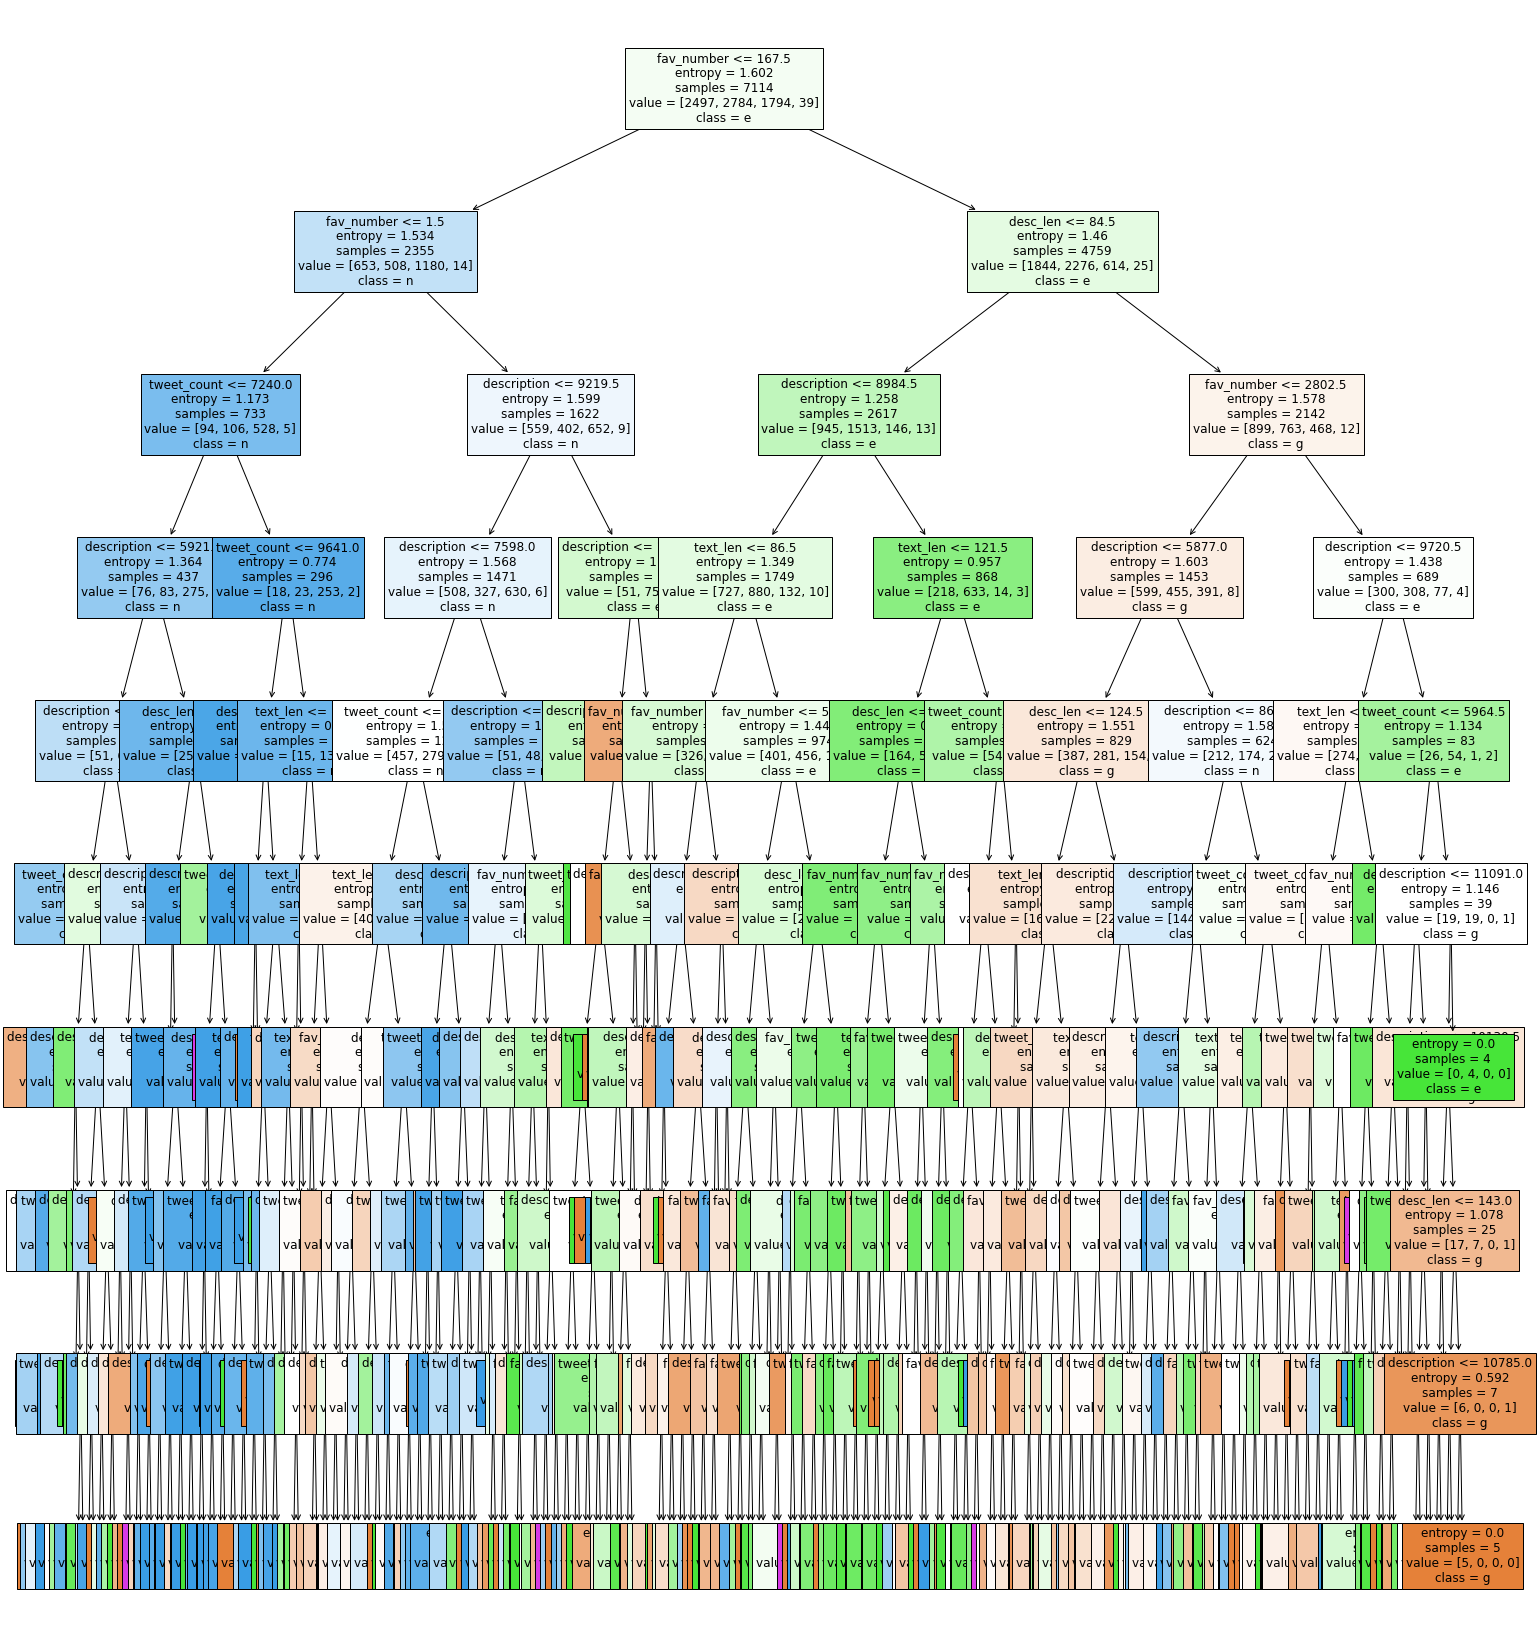

In [24]:
fig = plt.figure(figsize=(25,30))
_ = tree.plot_tree(dt2, 
                   feature_names=X.columns.values,  
                   class_names='gender',
                   filled=True, fontsize = 12)

### Creating 3 trees with different depths and plotting them(as asked in the assignment)

#### *Decision tree with depth = 3 and criterion = gini*

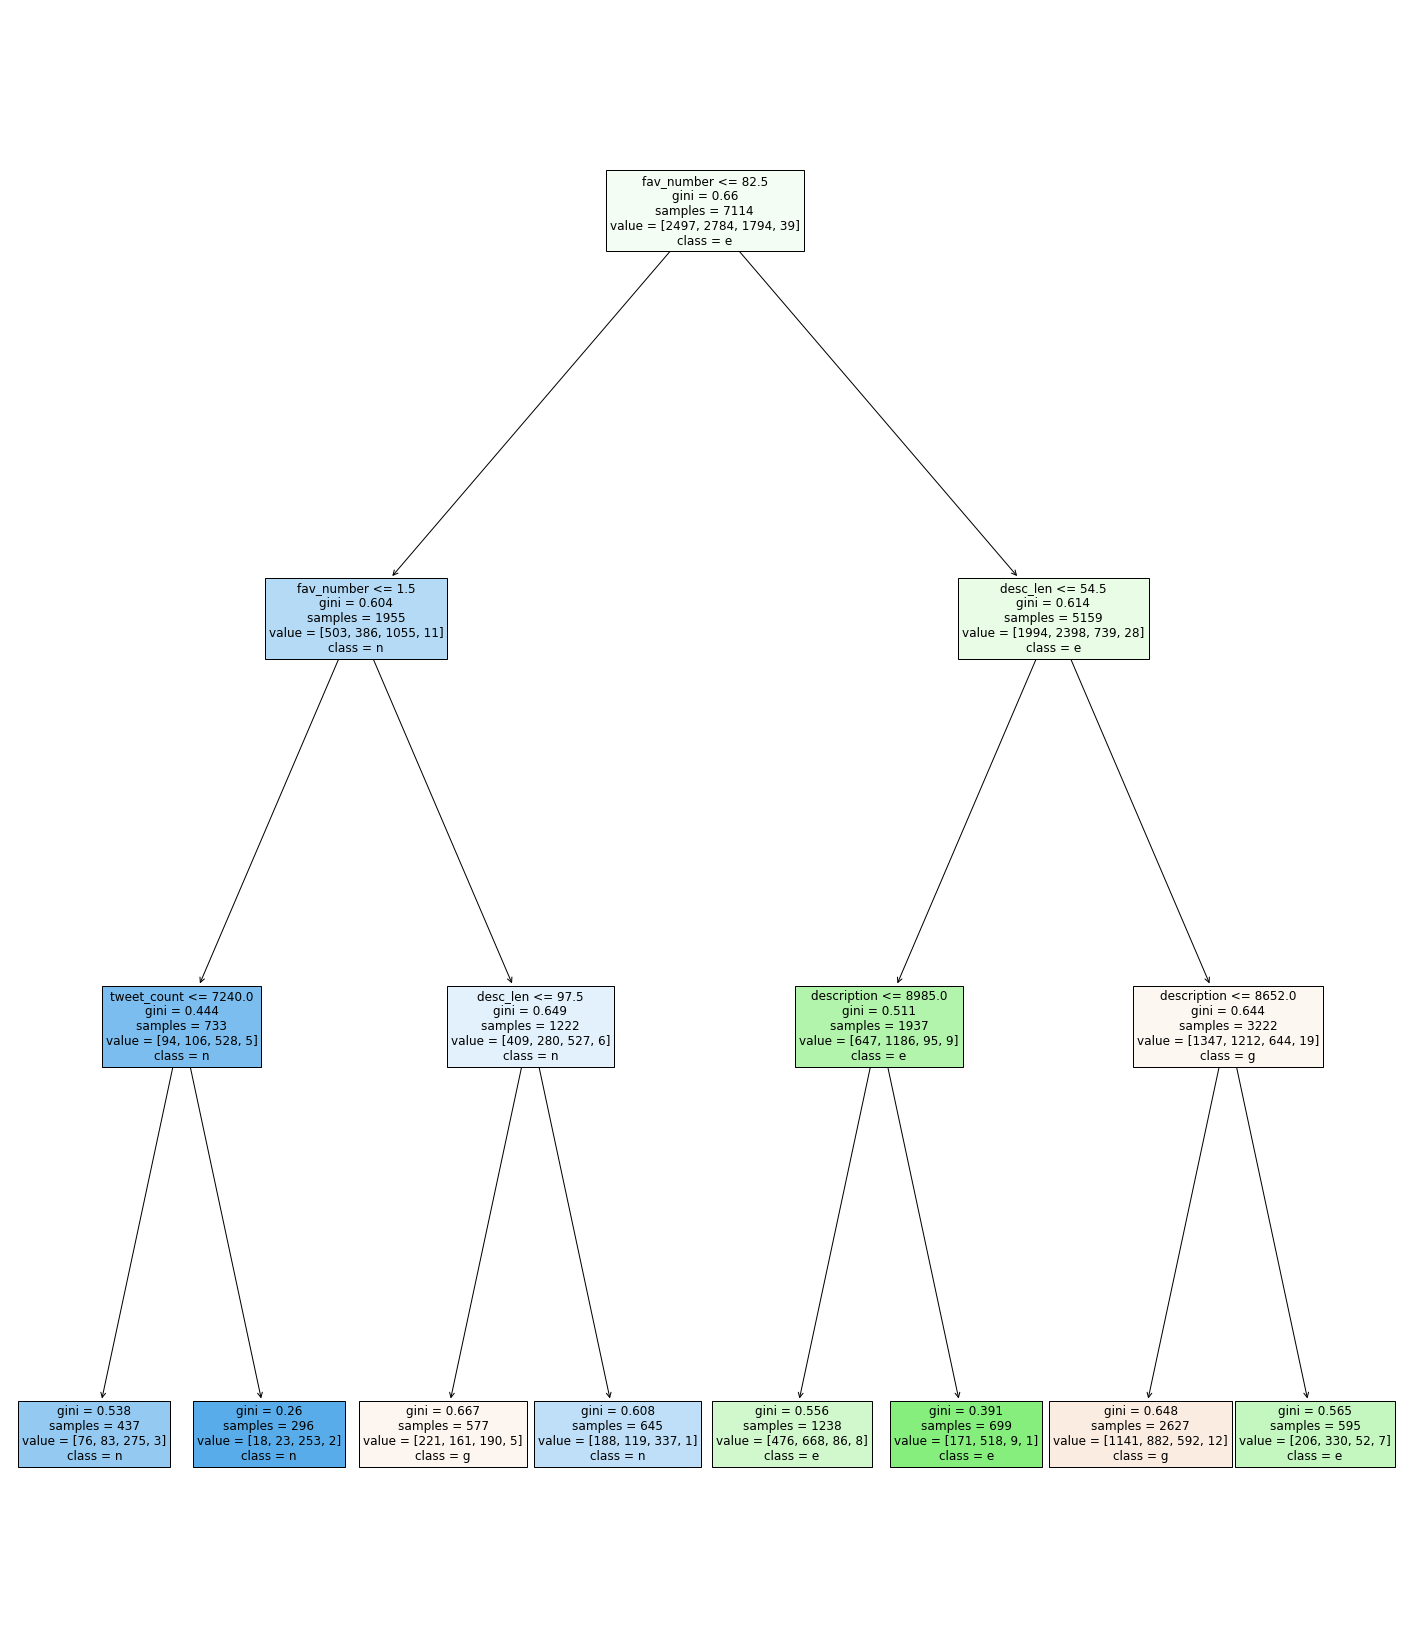

In [25]:
dt3 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
dt3.fit(X_train, y_train)

fig = plt.figure(figsize=(25,30))
_ = tree.plot_tree(dt3, 
                   feature_names=X.columns.values,  
                   class_names='gender',
                   filled=True, fontsize = 12)

#### *Decision tree with depth = 3 and criterion = entropy*

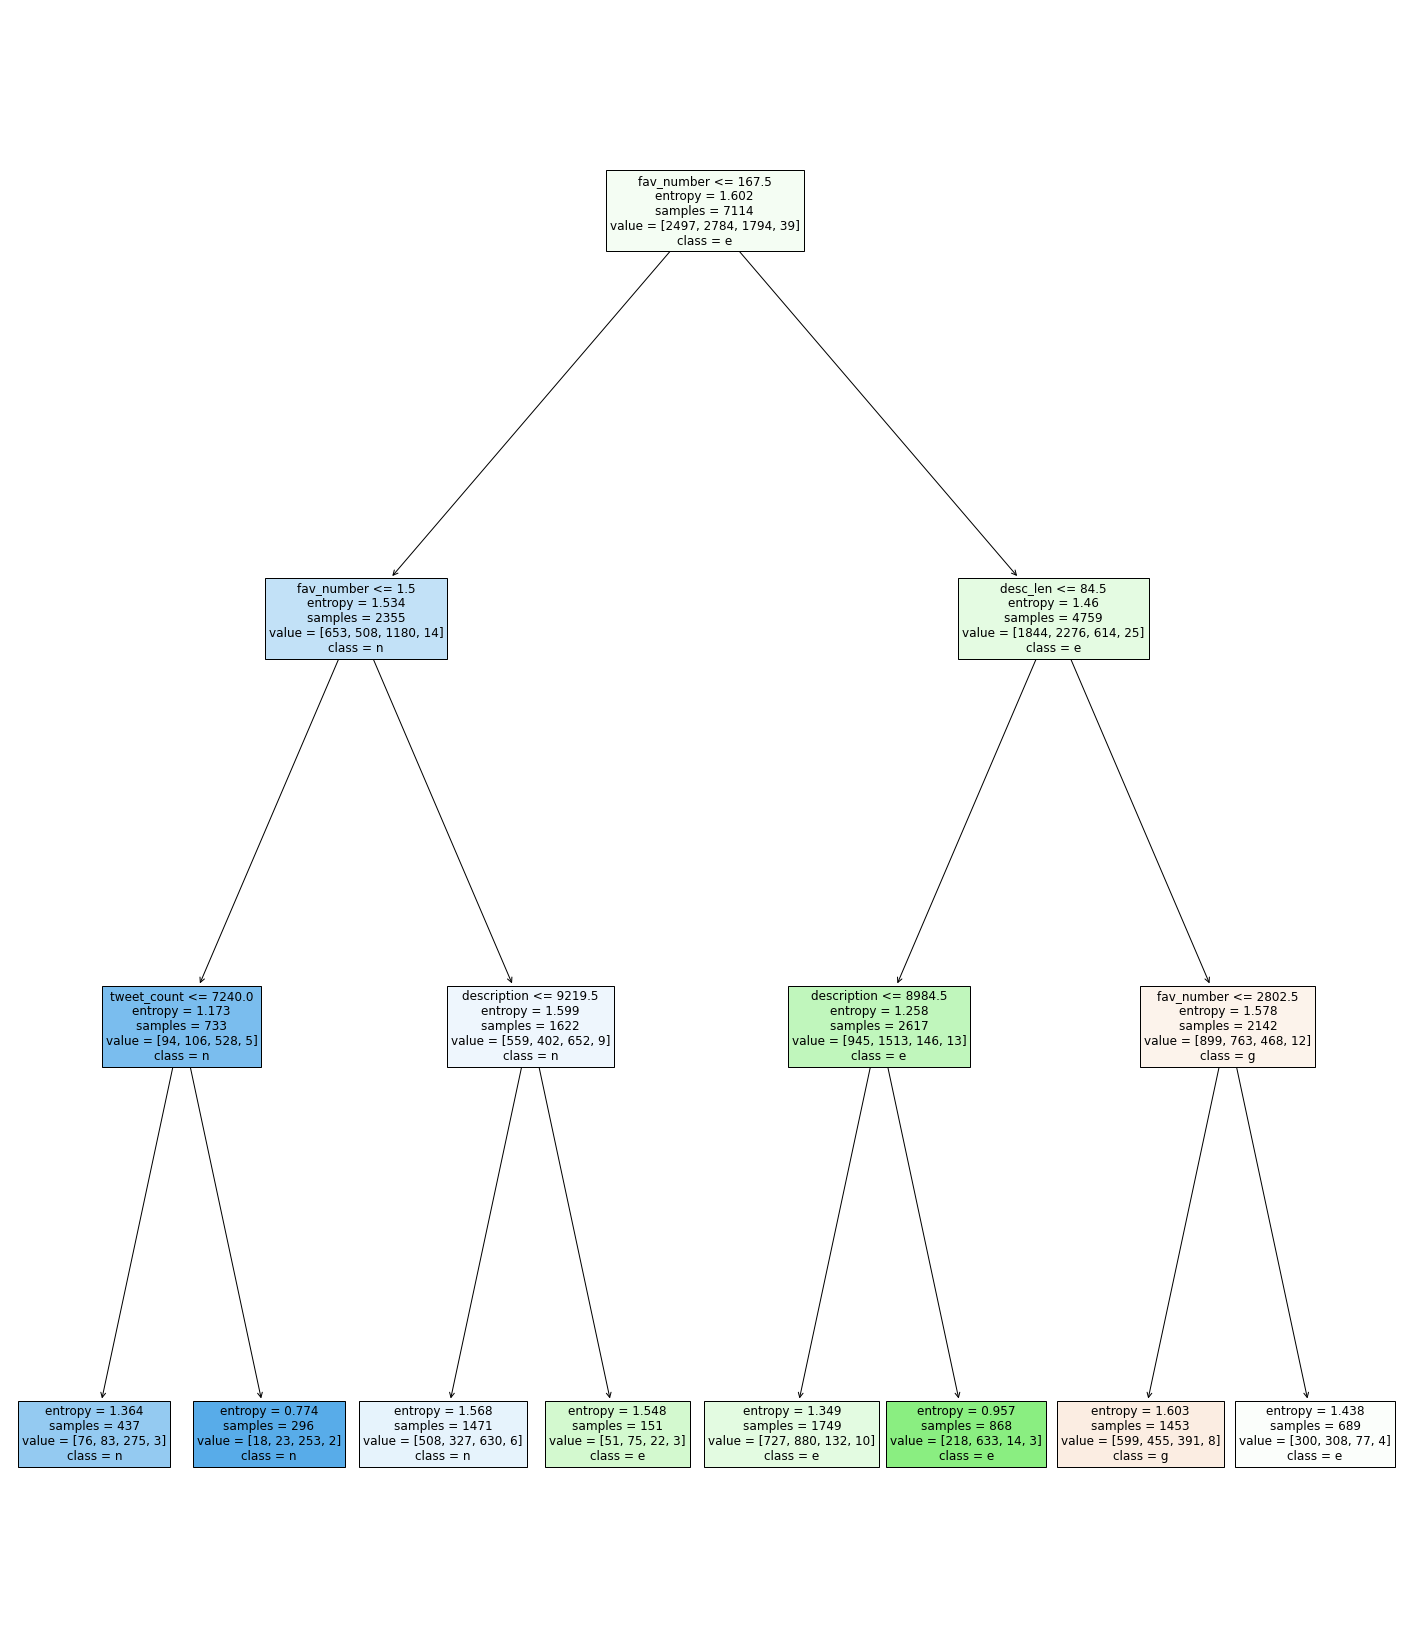

In [26]:
dt4 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dt4.fit(X_train, y_train)

fig = plt.figure(figsize=(25,30))
_ = tree.plot_tree(dt4, 
                   feature_names=X.columns.values,  
                   class_names='gender',
                   filled=True, fontsize = 12)

#### *Decision tree with depth = 4 and criterion = gini*

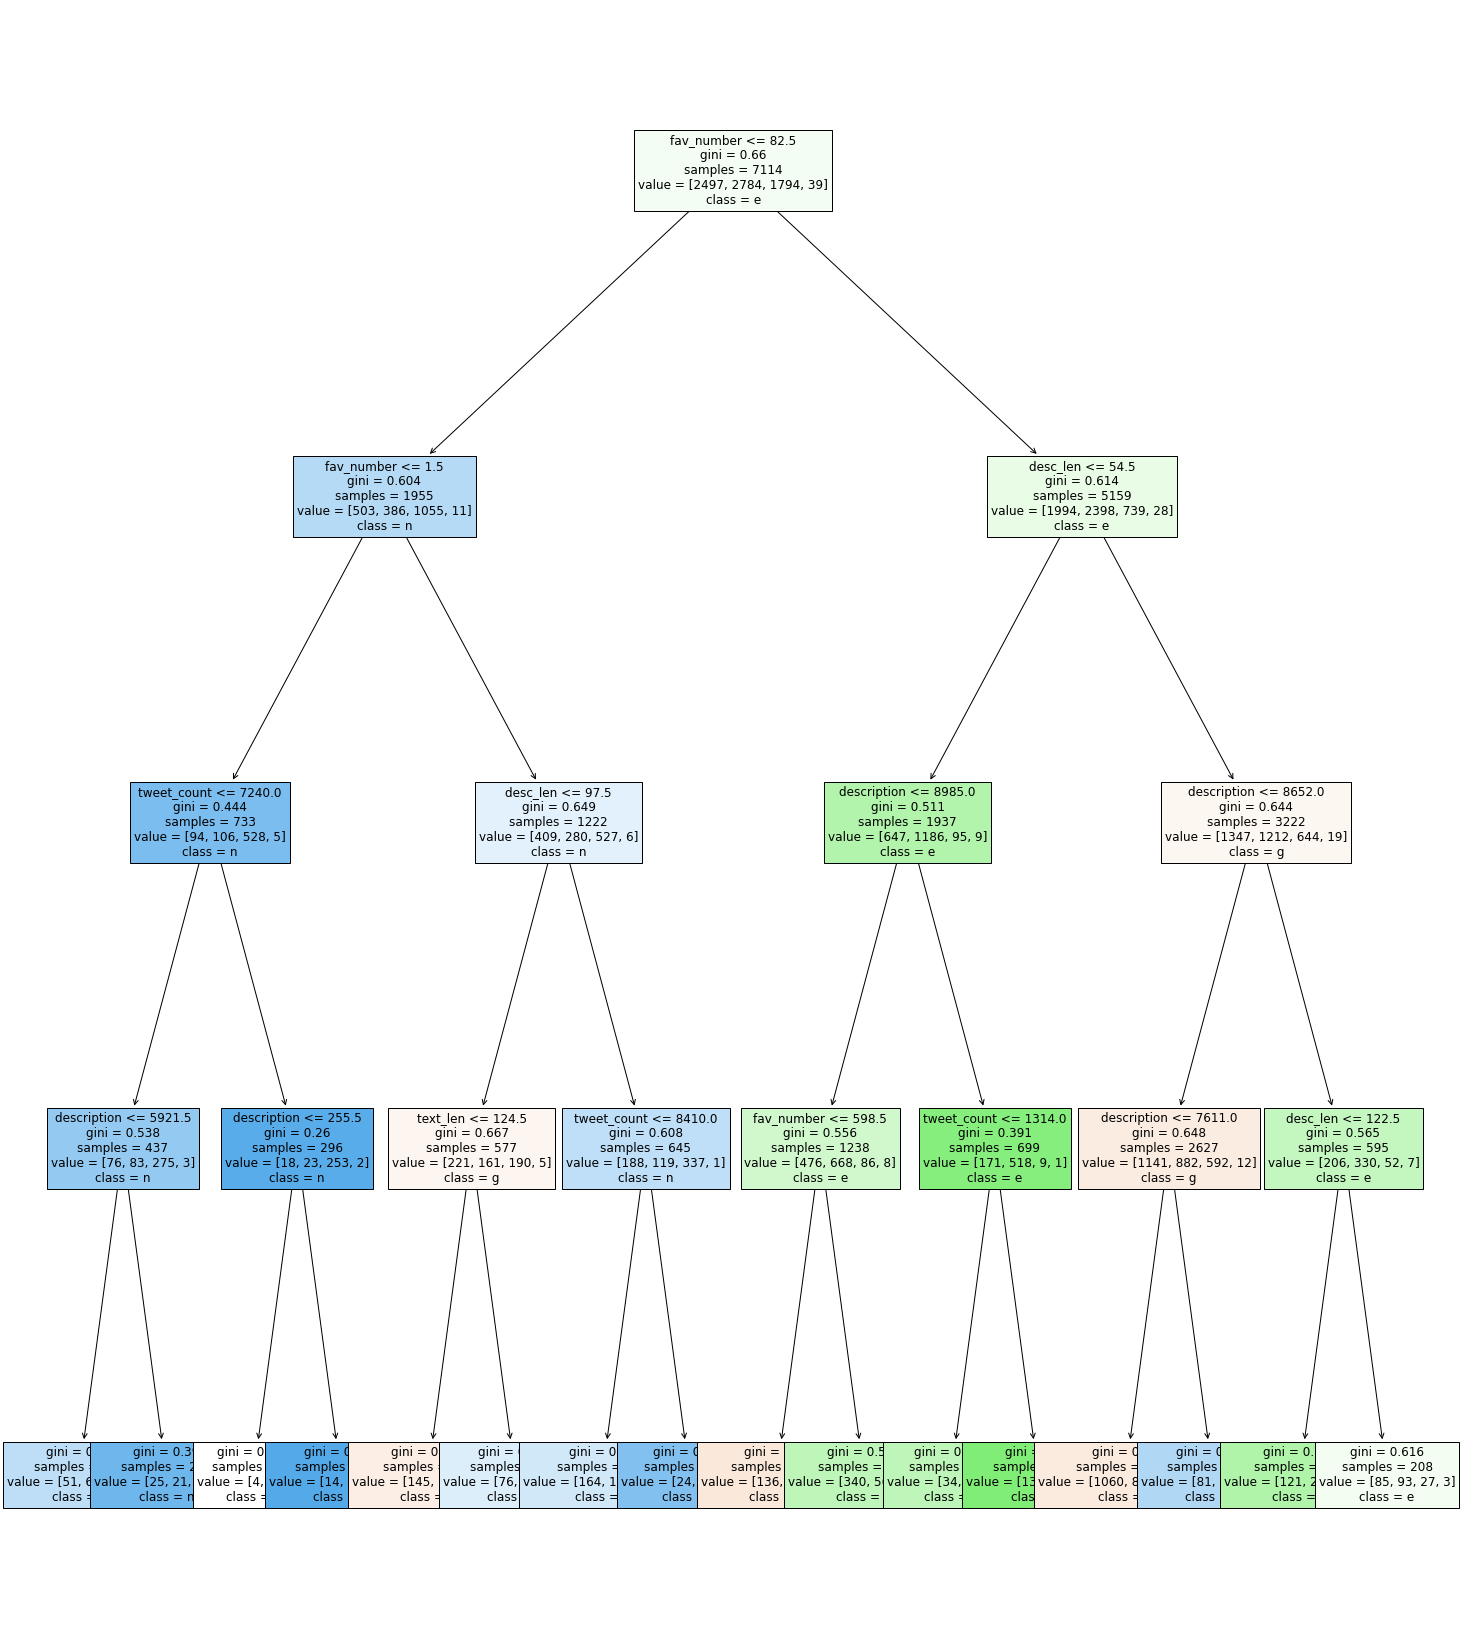

In [27]:
dt5 = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
dt5.fit(X_train, y_train)

fig = plt.figure(figsize=(25,30))
_ = tree.plot_tree(dt5, 
                   feature_names=X.columns.values,  
                   class_names='gender',
                   filled=True, fontsize = 12)

# *Naive Bayes (10 Points)*

1) Use all types of Naive bayes classifier present in the sklearn to predict the test data. If you are not able to implement any of the classifier explain in detail why it can't be done.[5 point] 

2) Use comments to explain your code and variable names[1 point]

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support)for all the NB Classifier. show the best classifier. Explain the classification report in your own words. Do not copy from the internet. [4 points]

There are different types of Naive Bayes classification models that can be created using scikit-learn. Below are a few of those:

a. Gaussian Naive Bayes

b. Multinomial Naive Bayes

c. Complement Naive Bayes

d. Bernoulli Naive Bayes

e. Categorical Naive Bayes

Following are the codes that implement these classifiers.

In [28]:
# Import the required packages from scikit - learn for building Naive Bayes classification model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB

## *Gaussian Naive Bayes*

In [29]:
# Create and fit a Gaussian Naive Bayes model
GNB = GaussianNB()
GNB.fit(X_train, y_train)

# Predict the values on test set
y3_pred = GNB.predict(X_test)

Printing the classification report:
              precision    recall  f1-score   support

           1       0.44      0.23      0.30       857
           2       0.56      0.62      0.59       880
           3       0.46      0.71      0.56       618
           4       0.00      0.00      0.00        17

    accuracy                           0.50      2372
   macro avg       0.36      0.39      0.36      2372
weighted avg       0.49      0.50      0.47      2372



Printing the confusion matrix:
[[200 358 299   0]
 [138 545 197   0]
 [120  62 436   0]
 [  1  10   6   0]]


c:\Users\patek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\patek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\patek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0, 0.5, 'male'),
 Text(0, 1.5, 'female'),
 Text(0, 2.5, 'brand'),
 Text(0, 3.5, 'unknown')]

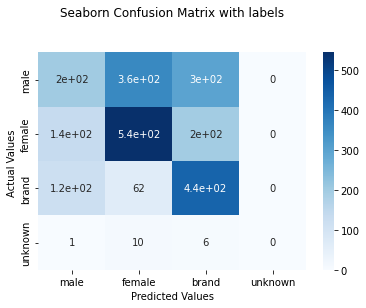

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

# Print the classification report and confusion matrix
labels = [1,2,3,4]
labels = list(map(str,labels))
print("Printing the classification report:")
print(classification_report(y_test, y3_pred,target_names=labels))

print("\n\nPrinting the confusion matrix:")
cm=confusion_matrix(y_test,y3_pred)
print(cm)

ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['male', 'female', 'brand', 'unknown'])
ax.yaxis.set_ticklabels(['male', 'female', 'brand', 'unknown'])


## *Multinomial Naive Bayes*

In [31]:
# Create and fit the Multinomial Naive Bayes model
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

# Predict the values on test set
y4_pred = MNB.predict(X_test)

Printing the classification report:
              precision    recall  f1-score   support

           1       0.48      0.22      0.30       857
           2       0.55      0.30      0.39       880
           3       0.46      0.69      0.55       618
           4       0.01      0.35      0.02        17

    accuracy                           0.37      2372
   macro avg       0.37      0.39      0.32      2372
weighted avg       0.50      0.37      0.40      2372



Printing the confusion matrix:
[[187 184 290 196]
 [148 267 206 259]
 [ 51  34 425 108]
 [  4   2   5   6]]


[Text(0, 0.5, 'male'),
 Text(0, 1.5, 'female'),
 Text(0, 2.5, 'brand'),
 Text(0, 3.5, 'unknown')]

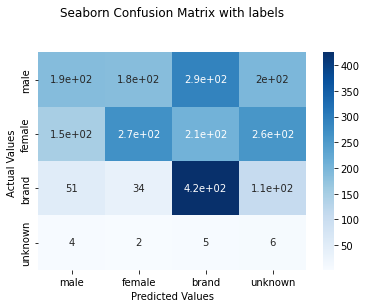

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

# Print the classification report and the confusion matrix
labels = [1,2,3,4]
labels = list(map(str,labels))
print("Printing the classification report:")
print(classification_report(y_test, y4_pred,target_names=labels))

print("\n\nPrinting the confusion matrix:")
cm=confusion_matrix(y_test,y4_pred)
print(cm)

ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['male', 'female', 'brand', 'unknown'])
ax.yaxis.set_ticklabels(['male', 'female', 'brand', 'unknown'])


## *Complement Naive Bayes*

In [33]:
# Create and fit the Complement Naive Bayes model
CNB = ComplementNB()
CNB.fit(X_train, y_train)

# Predict the values on test set
y5_pred = CNB.predict(X_test)

Printing the classification report:
              precision    recall  f1-score   support

           1       0.47      0.07      0.13       857
           2       0.53      0.55      0.54       880
           3       0.40      0.85      0.54       618
           4       0.00      0.00      0.00        17

    accuracy                           0.45      2372
   macro avg       0.35      0.37      0.30      2372
weighted avg       0.47      0.45      0.39      2372



Printing the confusion matrix:
[[ 63 351 443   0]
 [ 48 484 348   0]
 [ 21  73 524   0]
 [  3   3  11   0]]


c:\Users\patek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\patek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\patek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0, 0.5, 'male'),
 Text(0, 1.5, 'female'),
 Text(0, 2.5, 'brand'),
 Text(0, 3.5, 'unknown')]

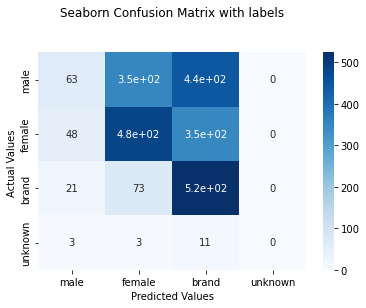

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

# Print the classification report and confusion matrix
labels = [1,2,3,4]
labels = list(map(str,labels))
print("Printing the classification report:")
print(classification_report(y_test, y5_pred,target_names=labels))

print("\n\nPrinting the confusion matrix:")
cm=confusion_matrix(y_test,y5_pred)
print(cm)

ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['male', 'female', 'brand', 'unknown'])
ax.yaxis.set_ticklabels(['male', 'female', 'brand', 'unknown'])


## *Bernoulli Naive Bayes*

In [35]:
# Create and fit the Bernoulli Naive Bayes model
BNB = BernoulliNB()
BNB.fit(X_train, y_train)

# Predict the values on test set
y6_pred = BNB.predict(X_test)

Printing the classification report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       857
           2       0.40      0.97      0.56       880
           3       0.72      0.27      0.40       618
           4       0.00      0.00      0.00        17

    accuracy                           0.43      2372
   macro avg       0.28      0.31      0.24      2372
weighted avg       0.33      0.43      0.31      2372



Printing the confusion matrix:
[[  0 823  34   0]
 [  0 850  30   0]
 [  0 449 169   0]
 [  0  15   2   0]]


c:\Users\patek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\patek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\patek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0, 0.5, 'male'),
 Text(0, 1.5, 'female'),
 Text(0, 2.5, 'brand'),
 Text(0, 3.5, 'unknown')]

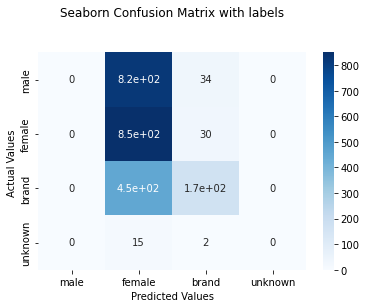

In [36]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

# Print the classification report and confusion matrix
labels = [1,2,3,4]
labels = list(map(str,labels))
print("Printing the classification report:")
print(classification_report(y_test, y6_pred,target_names=labels))

print("\n\nPrinting the confusion matrix:")
cm=confusion_matrix(y_test,y6_pred)
print(cm)

ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['male', 'female', 'brand', 'unknown'])
ax.yaxis.set_ticklabels(['male', 'female', 'brand', 'unknown'])


## *Categorical Naive Bayes*

In [37]:
# Create and fit the Categorical Naive Bayes model
CaNB = CategoricalNB()
CaNB.fit(X_train, y_train)

# Predict the values on test set
y7_pred = CaNB.predict(X_test)

Printing the classification report:
              precision    recall  f1-score   support

           1       0.42      0.33      0.37       857
           2       0.53      0.52      0.53       880
           3       0.49      0.66      0.56       618
           4       0.00      0.00      0.00        17

    accuracy                           0.48      2372
   macro avg       0.36      0.38      0.36      2372
weighted avg       0.48      0.48      0.48      2372



Printing the confusion matrix:
[[285 321 251   0]
 [253 459 168   0]
 [134  78 406   0]
 [  5   6   6   0]]


c:\Users\patek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\patek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\patek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0, 0.5, 'male'),
 Text(0, 1.5, 'female'),
 Text(0, 2.5, 'brand'),
 Text(0, 3.5, 'unknown')]

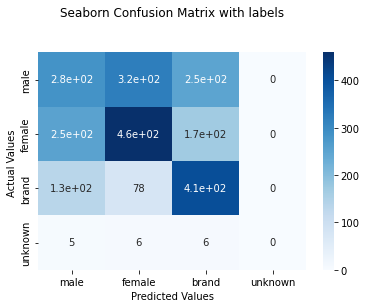

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

# Print the classification report and confusion matrix
labels = [1,2,3,4]
labels = list(map(str,labels))
print("Printing the classification report:")
print(classification_report(y_test, y7_pred,target_names=labels))

print("\n\nPrinting the confusion matrix:")
cm=confusion_matrix(y_test,y7_pred)
print(cm)

ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['male', 'female', 'brand', 'unknown'])
ax.yaxis.set_ticklabels(['male', 'female', 'brand', 'unknown'])


# *Visualizations:*

### *Visualization 1: Pairplot of the cleaned dataset*

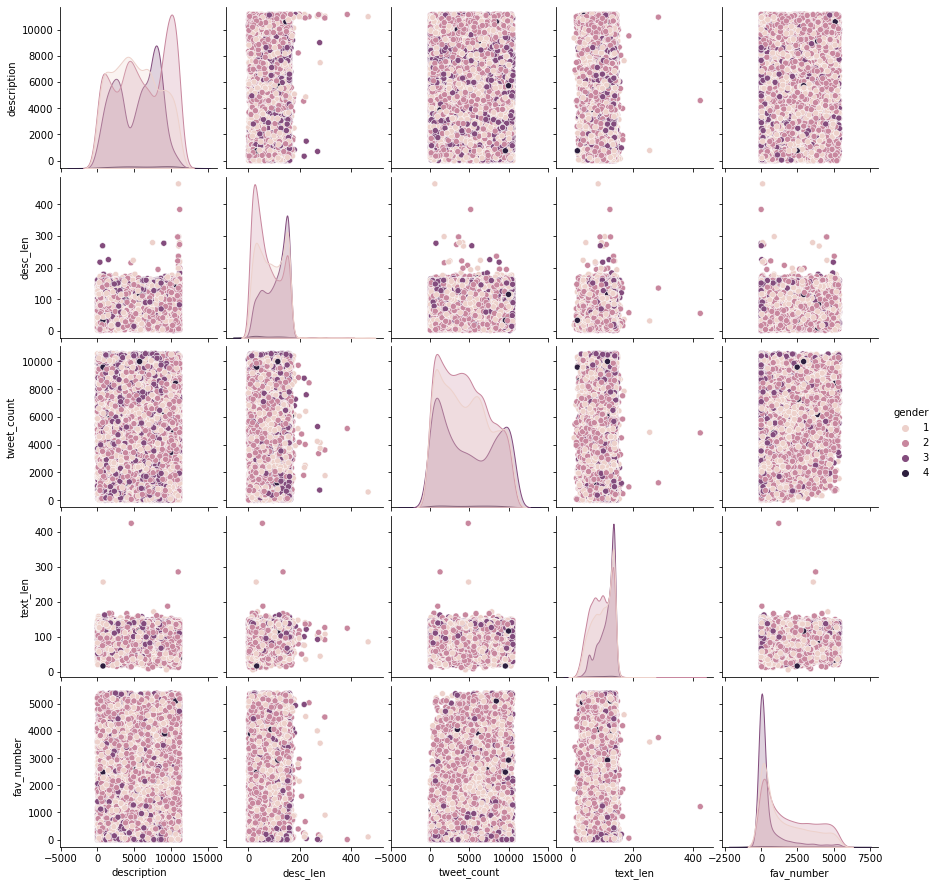

In [39]:
import seaborn as sns
sns.pairplot(df, hue='gender')
#df.info()

### *Visualization 2: Heatmap showing correlation coefficients between different fields of dataset*

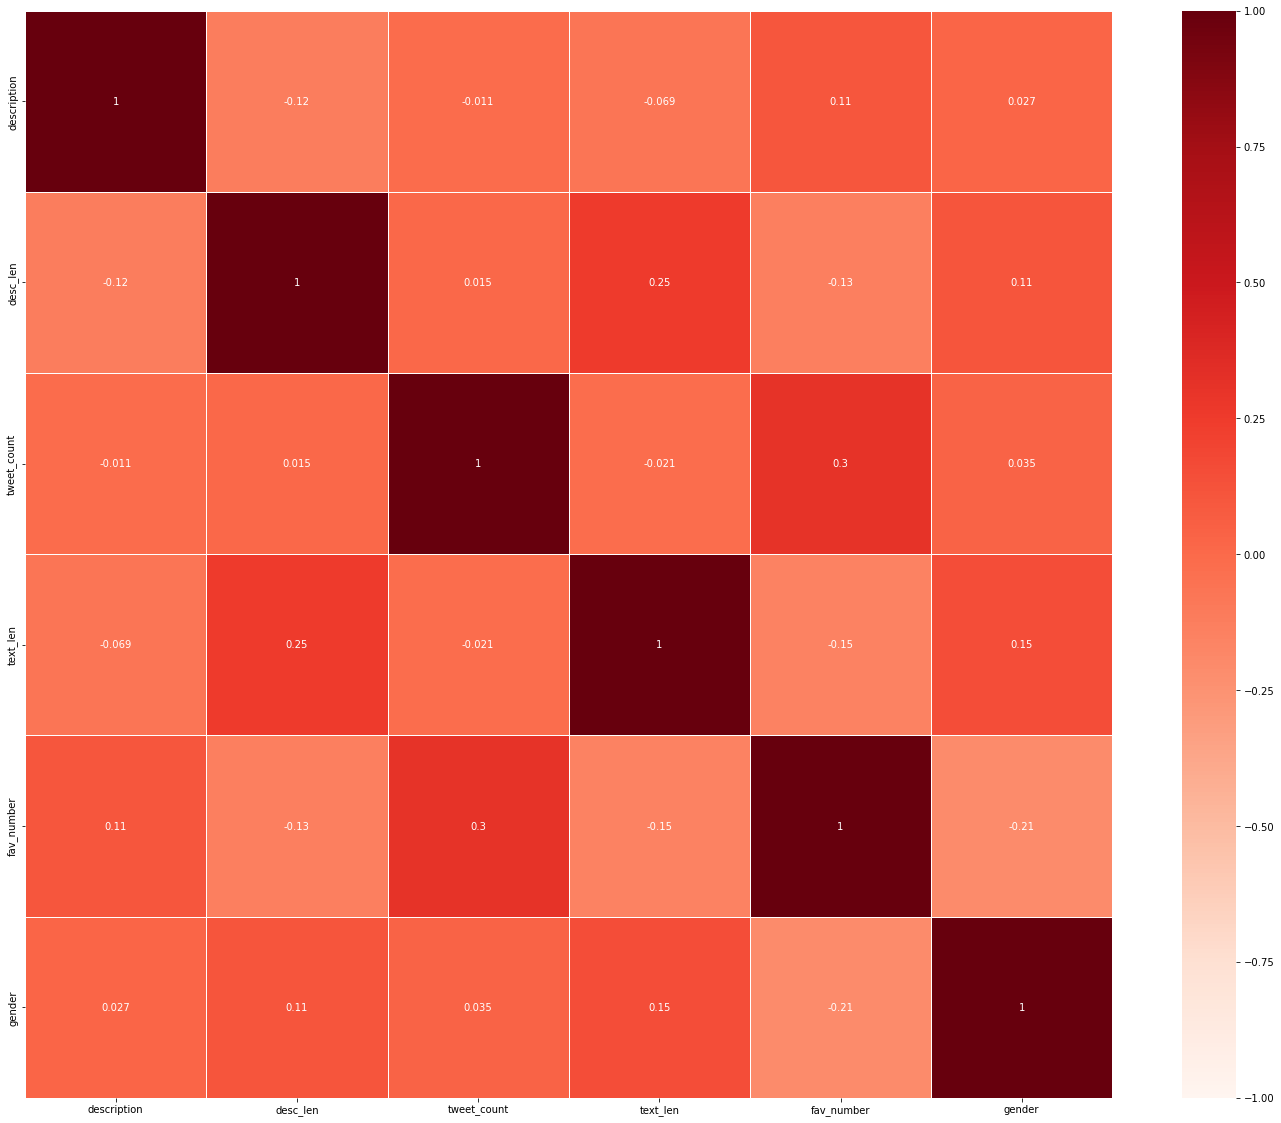

In [40]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(corr, linewidths=0.5, annot = True, square = True, vmax = 1, vmin = -1, cmap='Reds')
plt.show()

*From the two visualizations above we can see that the two fields tweet_count and fav_number are linearly correlated to the target field i.e. gender*

<AxesSubplot:>

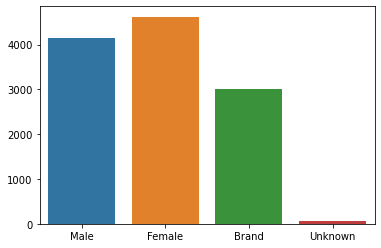

In [41]:
import seaborn as sns

m = df[df['gender'] == 1].shape[0]
f = df[df['gender'] == 2].shape[0]
b = df[df['gender'] == 3].shape[0]
u = df[df['gender'] == 4].shape[0]

sns.barplot(x = ['Male', 'Female', 'Brand', 'Unknown'], y = [m,f,b,u])

## Report (23 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier in details in your own words. Dont copy paste it from the internet. Write it on your own.  [5 points]

2) Describe the datasets like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [6 points]

4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy [4 points]

6) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!